In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

2025-05-06 16:45:26.589773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/goldy/miniconda3/envs/CEvNS/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/goldy/Documents/Stage_M1/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(
2025-05-06 16:45:28.466351: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_t

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------


In [2]:
pdfs = [dict(), dict()]

In [3]:
xlzd_source = fd.xlzd.XLZDERSource(configuration='60t')

cS1_min = xlzd_source.cS1_min
cS1_max = xlzd_source.cS1_max
log10_cS2_min = xlzd_source.log10_cS2_min
log10_cS2_max = xlzd_source.log10_cS2_max

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


In [4]:
conditions = 'good'
drift_field_V_cm = 240.
gas_field_kV_cm = 7.5
elife_ns = 10000e3
g1 = 0.27

# conditions = 'bad'
# drift_field_V_cm = 25.
# gas_field_kV_cm = 6.
# elife_ns = 10000e3
# g1 = 0.27

In [5]:
Mig_Solar = fd.xlzd.XLZDvMigSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


106.0
4.478437840938567e-06


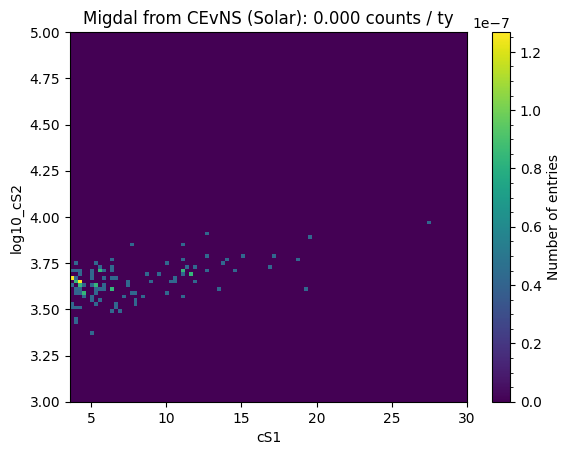

In [11]:
Mig_Solar_LNGS_hist = Histdd(bins=100, range=[[cS1_min, 30], [3, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Mig_Solar_LNGS_data = Mig_Solar.simulate(int(1e7))

Mig_Solar_LNGS_hist.add(Mig_Solar_LNGS_data['cs1'], np.log10(Mig_Solar_LNGS_data['cs2']))
print(Mig_Solar_LNGS_hist.n)
Mig_Solar_LNGS_mu = Mig_Solar.estimate_mu(n_trials=int(1e7))
Mig_Solar_LNGS_hist.histogram = Mig_Solar_LNGS_hist.histogram / Mig_Solar_LNGS_hist.n * Mig_Solar_LNGS_mu
print(Mig_Solar_LNGS_hist.n)
Mig_Solar_LNGS_hist.plot()
plt.title(f'Migdal from CEvNS (Solar): {Mig_Solar_LNGS_mu:.3f} counts / ty')

pdfs[1]['Mig_Solar_LNGS'] = Mig_Solar_LNGS_hist

In [7]:
CEvNS_Solar = fd.xlzd.XLZDvNRSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

/home/goldy/Documents/Stage_M1/flamedisx/flamedisx/source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


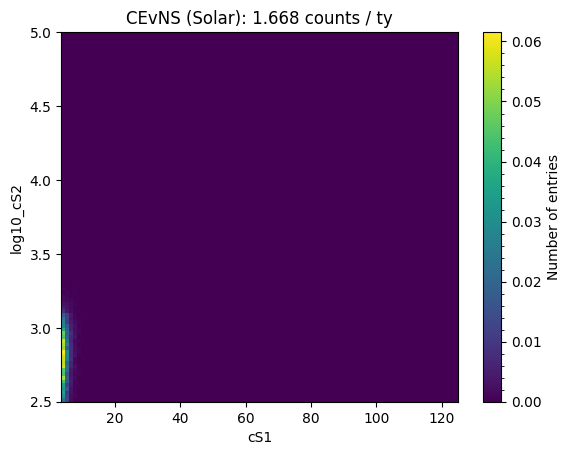

In [8]:
CEvNS_other_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_LNGS_data = CEvNS_Solar.simulate(int(1e6))

CEvNS_other_LNGS_hist.add(CEvNS_other_LNGS_data['cs1'], np.log10(CEvNS_other_LNGS_data['cs2']))

CEvNS_other_LNGS_mu = CEvNS_Solar.estimate_mu(n_trials=int(1e6))
CEvNS_other_LNGS_hist.histogram = CEvNS_other_LNGS_hist.histogram / CEvNS_other_LNGS_hist.n * CEvNS_other_LNGS_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS (Solar): {CEvNS_other_LNGS_mu:.3f} counts / ty')

pdfs[1]['CEvNS_other_LNGS'] = CEvNS_other_LNGS_hist

In [9]:
CEvNS_Solar = fd.xlzd.XLZDvNRnewSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

AttributeError: module 'flamedisx.xlzd' has no attribute 'XLZDvNRnewSolarSource'

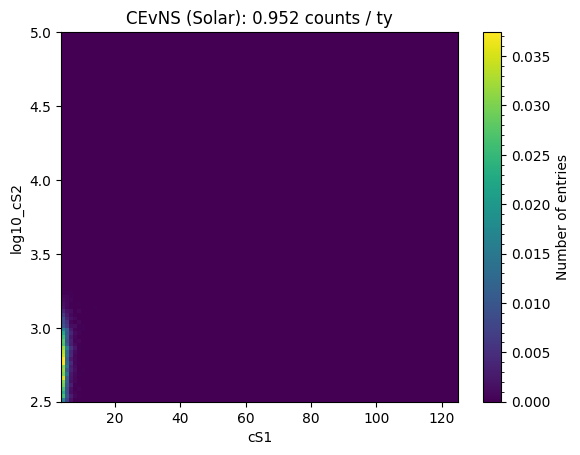

In [ ]:
CEvNS_other_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_LNGS_data = CEvNS_Solar.simulate(int(1e6))

CEvNS_other_LNGS_hist.add(CEvNS_other_LNGS_data['cs1'], np.log10(CEvNS_other_LNGS_data['cs2']))

CEvNS_other_LNGS_mu = CEvNS_Solar.estimate_mu(n_trials=int(1e6))
CEvNS_other_LNGS_hist.histogram = CEvNS_other_LNGS_hist.histogram / CEvNS_other_LNGS_hist.n * CEvNS_other_LNGS_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS (Solar): {CEvNS_other_LNGS_mu:.3f} counts / ty')

pdfs[1]['CEvNS_other_LNGS'] = CEvNS_other_LNGS_hist